In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("megaGymDataset.csv")
df.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2918 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


In [6]:
df.describe()

,Unnamed: 0,Rating
count,2918.000000,1031.000000
mean,1458.500000,5.919690
std,842.498368,3.584607
min,0.000000,0.000000
25%,729.250000,3.000000
50%,1458.500000,7.900000
75%,2187.750000,8.700000
max,2917.000000,9.600000


In [7]:
df.isnull().sum()

Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [8]:
df.columns = df.columns.str.replace('Unnamed: 0', 'index')


In [9]:
count_exercises = df.groupby(['BodyPart']).size().reset_index(name='Count')
count_exercises

,BodyPart,Count
0,Abdominals,662
1,Abductors,21
2,Adductors,17
3,Biceps,168
4,Calves,47
5,Chest,262
6,Forearms,31
7,Glutes,81
8,Hamstrings,121
9,Lats,124


In [71]:
count_exercises_type = df.groupby(['Type','BodyPart']).size().reset_index(name='Count')
count_exercises_type[(count_exercises_type['Type'] == 'Cardio') & (count_exercises_type['BodyPart'] == 'Abdominals')]['Count'].values[0]


2

In [11]:
count_exercises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BodyPart  17 non-null     object
 1   Count     17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


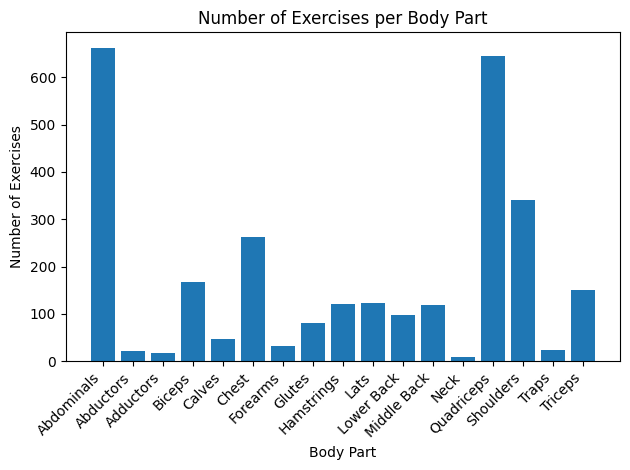

In [12]:

plt.bar(count_exercises['BodyPart'], count_exercises['Count'])
plt.xlabel('Body Part')
plt.ylabel('Number of Exercises')
plt.title('Number of Exercises per Body Part')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

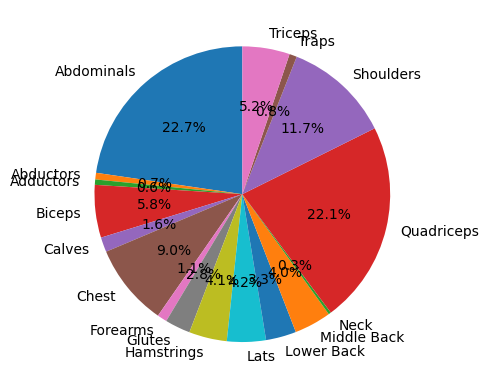

In [13]:
plt.pie(count_exercises['Count'], labels=count_exercises['BodyPart'], autopct='%1.1f%%', startangle=90)
plt.show()

**Top 5 exercises for each body part**

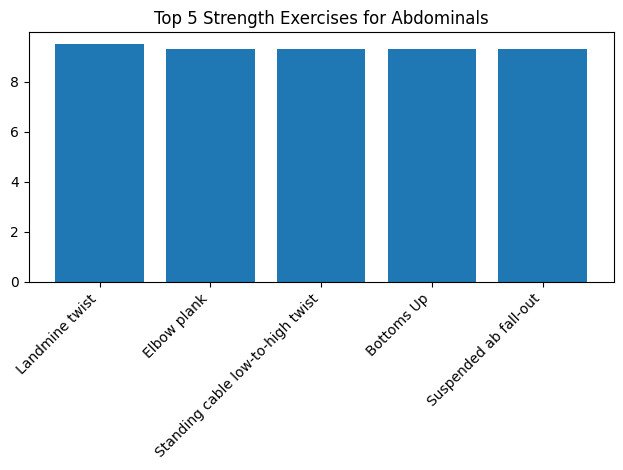

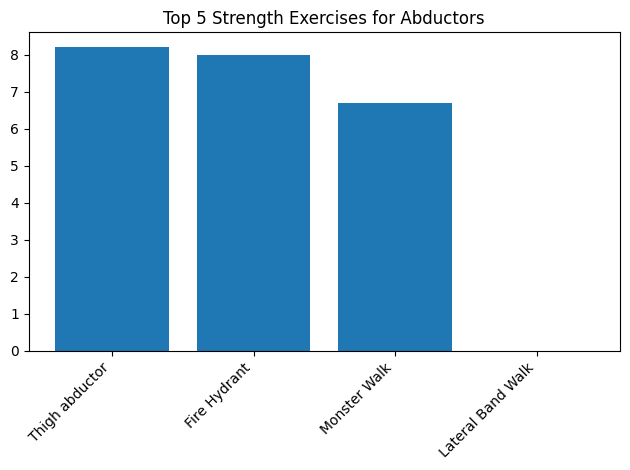

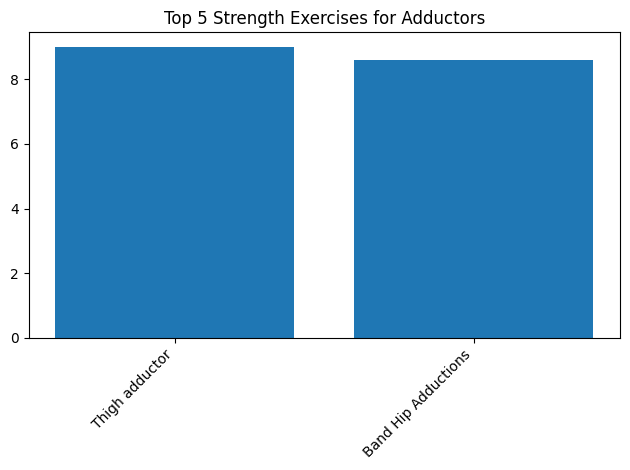

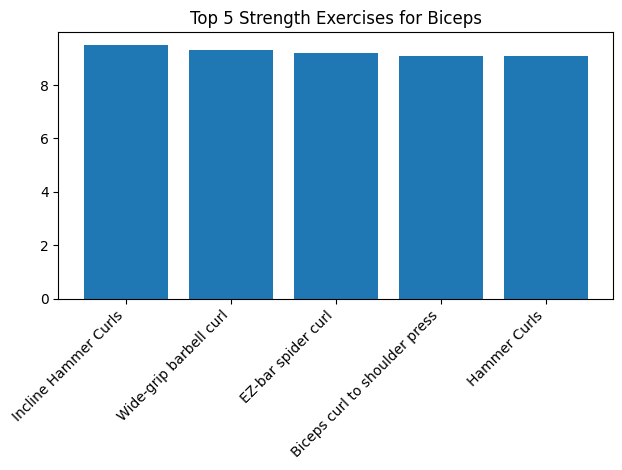

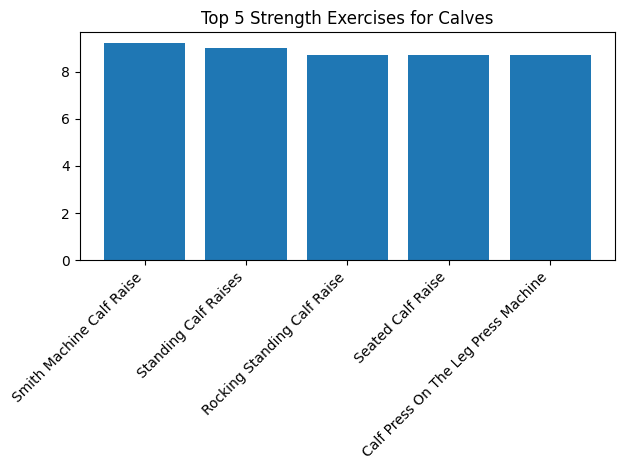

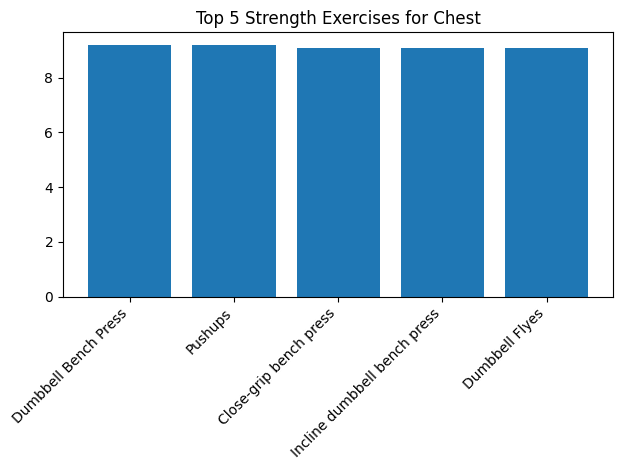

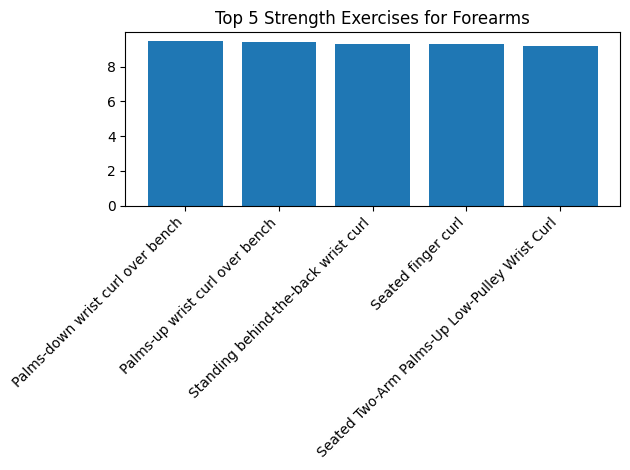

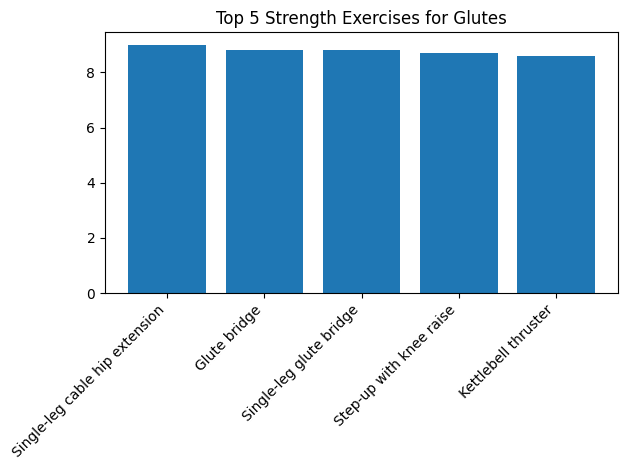

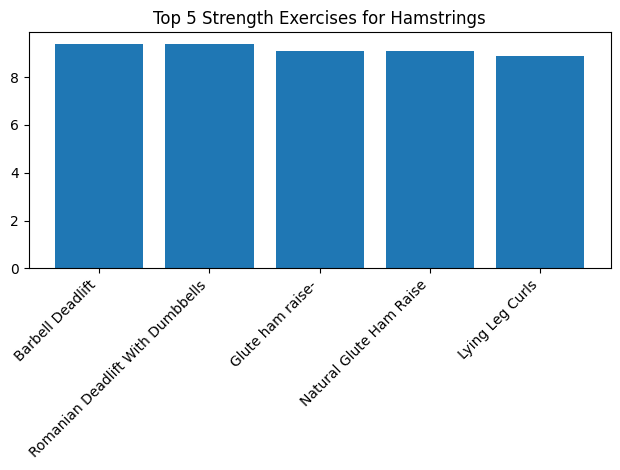

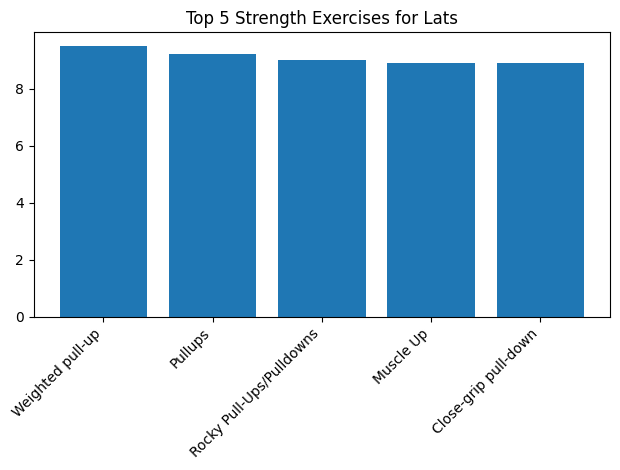

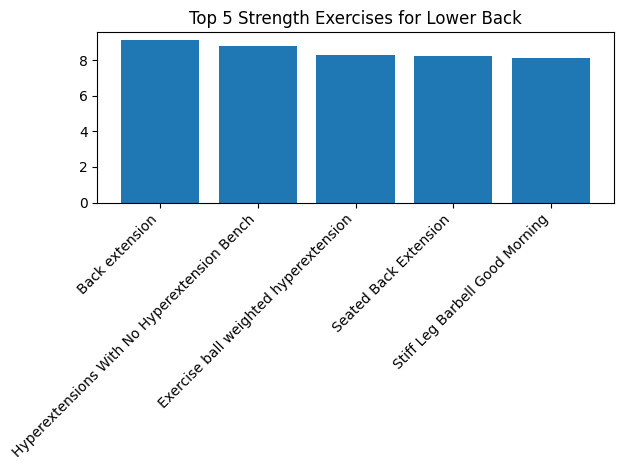

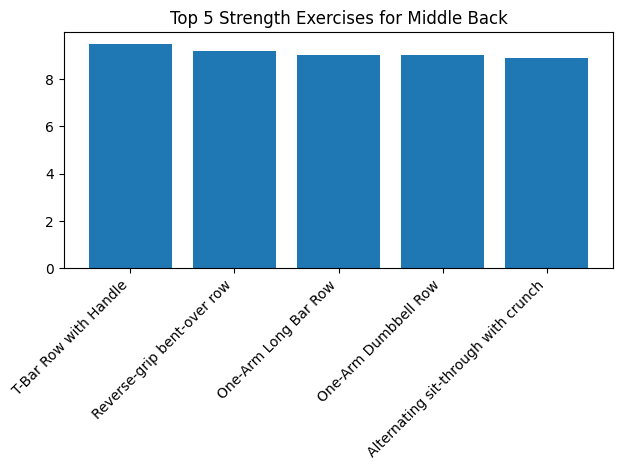

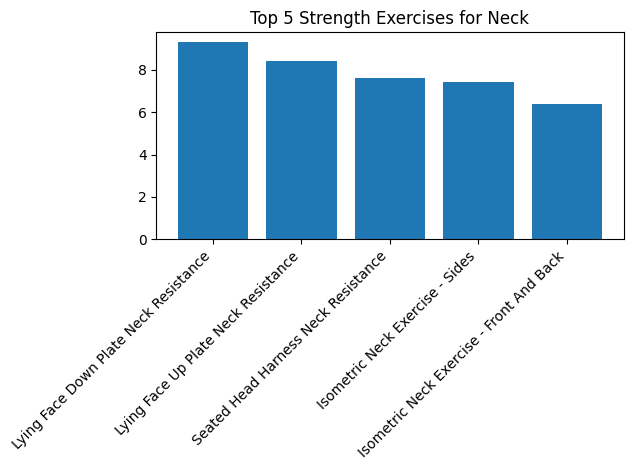

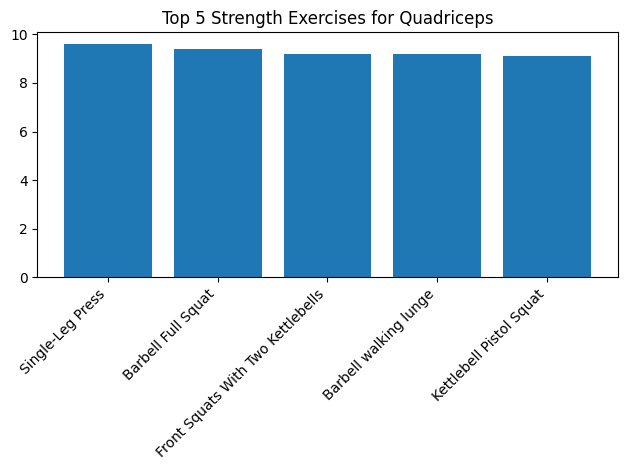

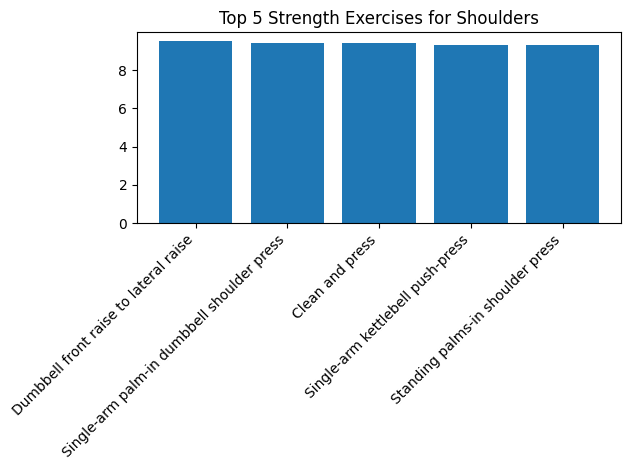

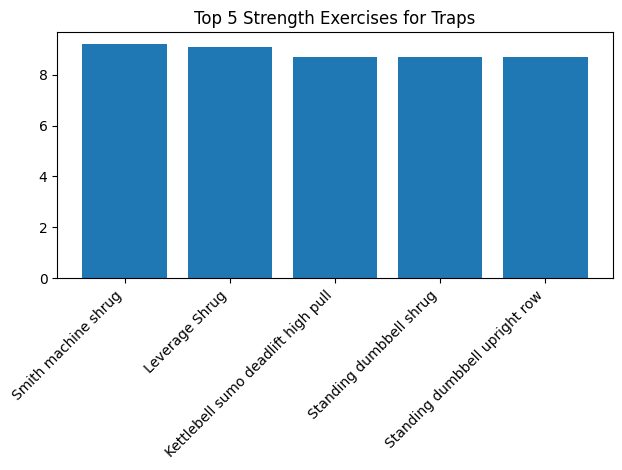

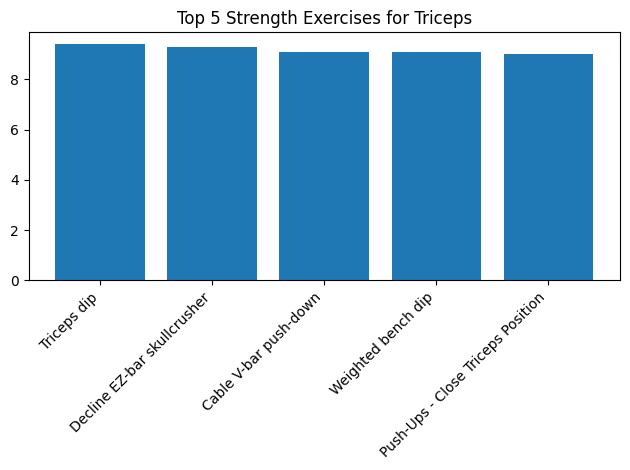

In [14]:
for part in count_exercises['BodyPart'] :
  exercises = df[(df['BodyPart'] == part) & (df['Type'] == 'Strength')].sort_values(by='Rating', ascending= False).head(5)
  plt.bar(exercises['Title'], exercises['Rating'])
  plt.title('Top 5 Strength Exercises for '+part)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


**Exersises for each level**

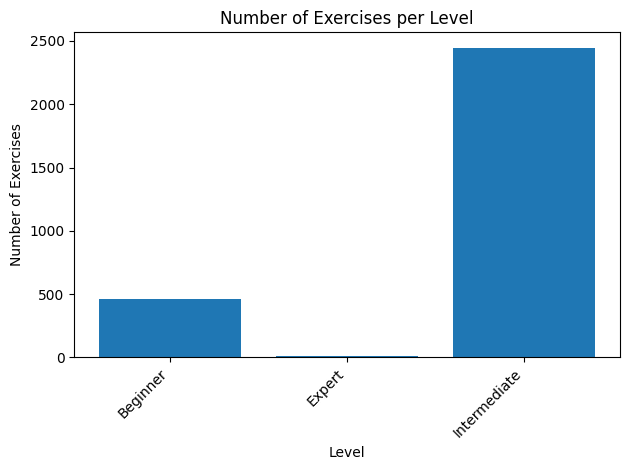

In [15]:
count_exercises_level = df.groupby(['Level']).size().reset_index(name='Count')
plt.bar(count_exercises_level['Level'], count_exercises_level['Count'])
plt.xlabel('Level')
plt.ylabel('Number of Exercises')
plt.title('Number of Exercises per Level')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

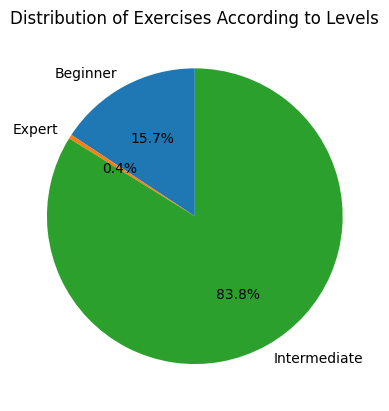

In [16]:
plt.pie(count_exercises_level['Count'], labels=count_exercises_level['Level'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Exercises According to Levels')
plt.show()

In [18]:
level = input("What is your level?")
days = input("How many days per week can you go to the gym?")
goal = input("What is your goal ?") #Cut/Bulk/Lean/Strength/Athletic

What is your level?Beginner
How many days per week can you go to the gym?4
What is your goal ?Strength


In [19]:
import pandas as pd
from IPython.display import display, HTML

unique_body_parts = df['BodyPart'].unique()
selected_exercises_df = pd.DataFrame(columns=['BodyPart', 'SelectedExercises'])

for part in unique_body_parts:
    filtered_exercises = df[(df['BodyPart'] == part) & (df['Type'] == 'Strength') & (df['Level'] == level)]
    top_exercises = filtered_exercises.sort_values(by='Rating', ascending=False).head(3)
    exercise_titles = top_exercises['Title'].tolist()
    selected_exercises_df = pd.concat([selected_exercises_df, pd.DataFrame({'BodyPart': [part], 'SelectedExercises': [exercise_titles]})], ignore_index=True)

display(HTML(selected_exercises_df.to_html()))


,BodyPart,SelectedExercises
0,Abdominals,"[Dumbbell spell caster, Plate Twist, Gorilla Chin/Crunch]"
1,Adductors,[Band Hip Adductions]
2,Abductors,[Fire Hydrant]
3,Biceps,"[Incline Hammer Curls, Wide-grip barbell curl, Biceps curl to shoulder press]"
4,Calves,"[Standing Calf Raises, Rocking Standing Calf Raise, Calf Press]"
5,Chest,"[Bodyweight Flyes, Reverse-grip incline dumbbell bench press, Wide-grip bench press]"
6,Forearms,"[Standing behind-the-back wrist curl, Seated finger curl, Seated Two-Arm Palms-Up Low-Pulley Wrist Curl]"
7,Glutes,"[Glute Kickback, Pull Through, Hip Extension with Bands]"
8,Hamstrings,"[Romanian Deadlift With Dumbbells, Glute ham raise-, Natural Glute Ham Raise]"
9,Lats,"[Rocky Pull-Ups/Pulldowns, Pull-up, Wide-Grip Rear Pull-Up]"


In [25]:
Push = ['Triceps', 'Shoulders' , 'Chest' ]
Pull = ['Biceps', 'Forearms' , 'Lats' , 'Middle Back', 'Traps']
Legs = [ 'Abductors'  , 'Hamstrings' , 'Quadriceps']
Glutes = ['Adductors', 'Glutes']
Core = ['Abdominals' , 'Lower Back']

Upper = Push + Pull
Lower = Legs + Glutes


In [41]:
programs={}

In [48]:
if days == 2:
    programs.update({'Upper': Upper})
    programs.update({'Legs' : Legs})
elif days == 3:
    programs['Push'] = Push
    programs['Pull'] = Pull
    programs['Legs'] = Legs
elif days == 4:
    print(days)
    programs['Push'] = Push
    programs['Pull'] = Pull
    programs['Legs'] = Legs
    programs['Core'] = Core
elif days == 5:
    programs['Chest'] = Push + ['Chest']
    programs['Back'] = Pull + ['Middle Back']
    programs['Shoulder'] = Push + ['Shoulders']
    programs['Legs'] = Legs
    programs['Core'] = Core
print(programs)
print(days)

{'Push': [{'Triceps': 2}, {'Shoulders': 2}, {'Chest': 3}], 'Pull': [{'Biceps': 2}, {'Forearms': 1}, {'Lats': 1}, {'Middle Back': 1}, {'Traps': 1}], 'Legs': [{'Abductors': 1}, {'Hamstrings': 2}, {'Quadriceps': 2}]}
3


In [49]:
Push = [{'Triceps' : 2}, {'Shoulders' : 2} , {'Chest' :3} ]
Pull = [{'Biceps' :2}, {'Forearms' :1}, {'Lats' :1}, {'Middle Back':1}, {'Traps':1}]
Legs = [ {'Abductors' :1} , {'Hamstrings' :2}, {'Quadriceps':2}]
Glutes = [{'Adductors':1}, {'Glutes':1}]
Core = [{'Abdominals' :3}, {'Lower Back':2}]

Upper = Push + Pull
Lower = Legs + Glutes


In [154]:
selected_program = pd.DataFrame(columns=['Day','BodyPart', 'SelectedExercises'])
for day in programs:
  for part in programs[day]:
    filtered_exercises = df[(df['BodyPart'] == next(iter(part))) & (df['Type'] == 'Strength') & (df['Level'] == level)]
    top_exercises = filtered_exercises.sort_values(by='Rating', ascending=False).head(part[next(iter(part))])
    exercise_titles = top_exercises['Title'].tolist()
    selected_program = pd.concat([selected_program, pd.DataFrame({'Day' : [day] , 'BodyPart': [next(iter(part))], 'SelectedExercises': [exercise_titles]})], ignore_index=True)
display(HTML(selected_program.to_html()))


,Day,BodyPart,SelectedExercises
0,Push,Triceps,"[Decline Close-Grip Bench To Skull Crusher, Decline Dumbbell Triceps Extension]"
1,Push,Shoulders,"[Power Partials, Snatch-Grip Behind-The-Neck Overhead Press]"
2,Push,Chest,"[Bodyweight Flyes, Reverse-grip incline dumbbell bench press, Wide-grip bench press]"
3,Pull,Biceps,"[Incline Hammer Curls, Wide-grip barbell curl]"
4,Pull,Forearms,[Standing behind-the-back wrist curl]
5,Pull,Lats,[Rocky Pull-Ups/Pulldowns]
6,Pull,Middle Back,[Bent Over Two-Dumbbell Row With Palms In]
7,Pull,Traps,[Calf-Machine Shoulder Shrug]
8,Legs,Abductors,[Fire Hydrant]
9,Legs,Hamstrings,"[Romanian Deadlift With Dumbbells, Glute ham raise-]"


In [58]:
Types=[]
if (goal=="Cut") :
  Types=[{'Cardio' : 0.5},{'Strength' : 0.5}]
elif(goal=="Lean") :
  Types=[{'Cardio' : 0.25},{'Strength' : 0.75}]
elif(goal=="Bulk") :
  Types=[{'Powerlifting' : 0.5},{'Strength' : 0.5}]
elif(goal=="Strength") :
  Types=[{'Strongman' : 0.5},{'Strength' : 0.5}]
elif(goal=="Athletic") :
  Types=[{'Plyometrics' : 0.5},{'Olympic Weightlifting' : 0.5}]

In [152]:
Level='Beginner'

In [157]:
selected_program = pd.DataFrame(columns=['Day','BodyPart', 'Type', 'SelectedExercises'])
if(goal=="Cut"):
  for day in programs:
    for part in programs[day]:
      filtered_exercises = df[(df['BodyPart'] == next(iter(part))) & (df['Type'] == 'Cardio')]
      top_exercises = filtered_exercises.sort_values(by='Rating', ascending=False).head(round(part[next(iter(part))]*0.5))
      exercise_titles = top_exercises['Title'].tolist()
      count_exos=len(top_exercises)
      if(count_exos>=0):
        selected_program = pd.concat([selected_program, pd.DataFrame({'Day' : [day] , 'BodyPart': [next(iter(part))], 'Type' : 'Cardio' ,'SelectedExercises': [exercise_titles]})], ignore_index=True)

        filtered_exercises_S = df[(df['BodyPart'] == next(iter(part))) & (df['Type'] == 'Strength') & (df['Level'] == level)]
        top_exercises_S = filtered_exercises_S.sort_values(by='Rating', ascending=False).head(part[next(iter(part))]-count_exos)
        exercise_titles_S=top_exercises_S['Title'].tolist()
      selected_program = pd.concat([selected_program, pd.DataFrame({'Day' : [day] , 'BodyPart': [next(iter(part))], 'Type' : 'Strength', 'SelectedExercises': [exercise_titles_S]})], ignore_index=True)
  display(HTML(selected_program.to_html()))


,Day,BodyPart,Type,SelectedExercises
0,Push,Triceps,Cardio,[]
1,Push,Triceps,Strength,"[Decline Close-Grip Bench To Skull Crusher, Decline Dumbbell Triceps Extension]"
2,Push,Shoulders,Cardio,[Shadow boxing]
3,Push,Shoulders,Strength,[Power Partials]
4,Push,Chest,Cardio,[Swimming]
5,Push,Chest,Strength,"[Bodyweight Flyes, Reverse-grip incline dumbbell bench press]"
6,Pull,Biceps,Cardio,[]
7,Pull,Biceps,Strength,"[Incline Hammer Curls, Wide-grip barbell curl]"
8,Pull,Forearms,Cardio,[]
9,Pull,Forearms,Strength,[Standing behind-the-back wrist curl]


In [131]:
df[(df['Type']=='Cardio') & (df['BodyPart']=="Quadriceps")]


,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2000,2000,Bicycling,NaN,Cardio,Quadriceps,Other,Intermediate,8.9,Average
2002,2002,Skating,NaN,Cardio,Quadriceps,Other,Beginner,8.4,Average
2030,2030,Double Under,NaN,Cardio,Quadriceps,Other,Beginner,0.0,NaN
2031,2031,Plate push,The plate push is a conditioning exercise that...,Cardio,Quadriceps,Other,Intermediate,NaN,NaN
2066,2066,Stair climber,The stair climber is a popular cardio machine ...,Cardio,Quadriceps,Machine,Intermediate,9.1,Average
2068,2068,Elliptical trainer,The elliptical trainer is a popular machine fo...,Cardio,Quadriceps,Machine,Intermediate,8.8,Average
2071,2071,Stairmaster,The stair climber is a popular cardio machine ...,Cardio,Quadriceps,Machine,Intermediate,8.8,Average
2075,2075,Treadmill running,Treadmill running is a popular cardiovascular ...,Cardio,Quadriceps,Machine,Intermediate,8.4,Average
2076,2076,Stationary bike,The stationary bike is a popular cardio machin...,Cardio,Quadriceps,Machine,Intermediate,8.3,Average
2077,2077,Treadmill jogging,Treadmill jogging is a popular cardiovascular ...,Cardio,Quadriceps,Machine,Intermediate,8.3,Average
